In [28]:
# Nous allons charger les outils de base dont nous aurons besoin – numpy et pandas évidemment, mais aussi des outils pour obtenir 
# et rééchantillonner les données, et le module de temps afin que nous puissions effectuer une analyse comparative de base.

In [29]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils import resample
import time
import warnings
warnings.filterwarnings('ignore')


In [30]:
# Nous nous en tiendrons principalement à scikit-learn, mais à des fins de comparaison, nous inclurons également 
# l’implémentation MulticoreTSNE de t-SNE, qui a des performances nettement meilleures que le t-SNE scikit-learn actuel.

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE
from umap import UMAP

In [32]:
# Ensuite, nous aurons besoin d’outils de traçage et, bien sûr, de quelques données avec lesquelles travailler. 
# Pour cette comparaison des performances, nous utiliserons par défaut le benchmark désormais standard de l’apprentissage multiple :
#  l’ensemble de données de chiffres MNIST. Nous pouvons utiliser scikit-learn pour le saisir pour nous.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
sns.set(context='notebook',
        rc={'figure.figsize':(12,10)},
        palette=sns.color_palette('tab10', 10))

In [35]:
mnist = fetch_openml('Fashion-MNIST', version=1)

In [36]:
# Il est maintenant temps de commencer à examiner la performance. Pour commencer, examinons comment les performances évoluent avec 
# l’augmentation de la taille du jeu de données.

In [37]:
# Mise à l’échelle des performances par taille de jeu de données

kjhdkjhfkjhkd hjkjhkdhjf kjdhjfh

In [38]:
# À mesure que la taille d’un jeu de données augmente, 
# la durée d’exécution d’un algorithme de réduction de 
# dimension donnée augmente à des rythmes variables. 
# Si vous souhaitez exécuter votre algorithme sur des jeux de 
# données plus volumineux, vous vous soucierez non seulement 
# de l’exécution comparative sur un seul petit jeu de données,
#  mais aussi de la façon dont les performances évoluent à mesure 
# que vous passez à des jeux de données plus volumineux.
#  Nous pouvons similier cela en sous-échantillonnant à partir 
# de chiffres MNIST (via l’utilitaire pratique de scikit-learn) 
# et en examinant le temps d’exécution pour des sous-échantillons
#  de tailles variables. Étant donné qu’il y a un certain caractère 
# aléatoire impliqué ici (à la fois dans la sélection du sous-échantillon
#  et dans certains des algorithmes qui ont des aspects stochastiques), 
# nous voudrons exécuter quelques exemples pour chaque taille de jeu de données.
#  Nous pouvons facilement empaqueter tout cela dans une fonction simple qui
#  renverra une trame de données pandas pratique de tailles de jeux de données 
# et d’exécutions en fonction d’un algorithme.

In [39]:
def data_size_scaling(algorithm, data, sizes=[100, 200, 400, 800, 1600], n_runs=5):
    result = []
    for size in sizes:
        for run in range(n_runs):
            subsample = resample(data, n_samples=size)
            start_time = time.time()
            algorithm.fit(subsample)
            elapsed_time = time.time() - start_time
            del subsample
            result.append((size, elapsed_time))
    return pd.DataFrame(result, columns=('dataset size', 'runtime (s)'))

    

In [40]:
# Maintenant, nous voulons simplement exécuter cela pour chacune
# des différentes implémentations de réduction de dimension afin
# que nous puissions examiner les résultats. Comme nous ne savons 
# pas combien de temps ces séries pourraient prendre, nous allons 
# commencer avec un très petit ensemble d’échantillons, jusqu’à 
# seulement 1600 échantillons.

In [41]:
all_algorithms = [
    UMAP(),
    MulticoreTSNE(),
    TSNE(), 
]
performance_data = {}
for algorithm in all_algorithms:
    alg_name = str(algorithm)
    if 'MulticoreTSNE' in alg_name:
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = alg_name.split('(')[0]

    performance_data[alg_name] = data_size_scaling(algorithm, mnist.data, n_runs=3)

KeyboardInterrupt: 

In [ ]:
# Maintenant, traçons les résultats afin que nous puissions voir ce qui se passe. 
# Nous utiliserons le diagramme de régression de seaborn pour interpoler la mise à l’échelle effective.
performance_data.items()

dict_items([('UMAP',     dataset size  runtime (s)
0            100     5.425680
1            100     5.618345
2            100     4.020406
3            200     4.623095
4            200     4.174262
5            200     4.708828
6            400     5.009657
7            400     5.892244
8            400     5.821573
9            800     5.737832
10           800     5.685818
11           800     5.941444
12          1600    10.544663
13          1600     9.950403
14          1600     9.214361), ('MulticoreTSNE',     dataset size  runtime (s)
0            100     0.577567
1            100     0.552785
2            100     0.593729
3            200     1.404710
4            200     1.336228
5            200     1.620845
6            400     5.026500
7            400     3.450047
8            400     3.121947
9            800     8.379336
10           800     7.333879
11           800     6.963778
12          1600    16.745827
13          1600    15.653093
14          1600    16.172139

c:\Users\SCD UM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SCD UM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SCD UM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


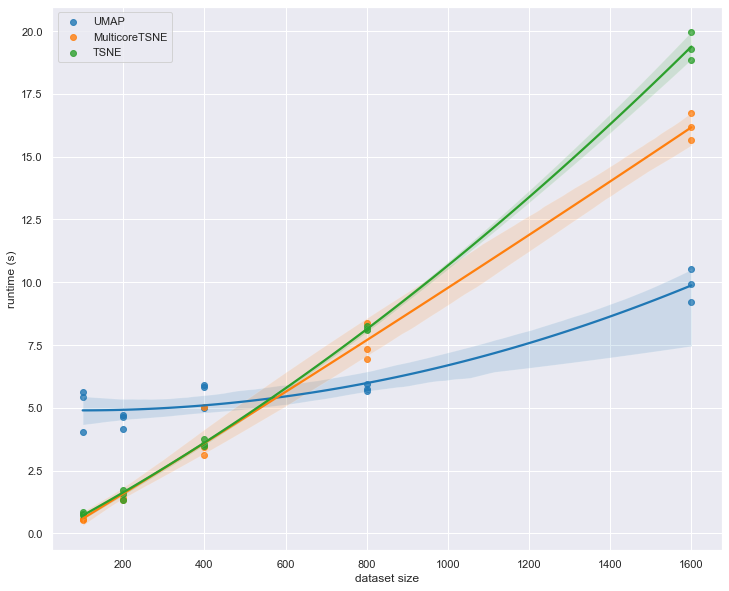

In [ ]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend();

In [ ]:
# Mise à l’échelle des performances d’exécution de t-SNE et UMAP sur différentes tailles
# sous-échantillons de l’ensemble de données de mnist. La ligne t-SNE inférieure est le mur
# temps d’exécution d’horloge pour Multicore t-SNE utilisant 8 cœurs.

In [ ]:
# À mesure que la dimension ambiante augmente au-delà de quelques
# # milliers de dimensions, le coût de calcul de t-SNE, FIt-SNE augmente considérablement, tandis que UMAP continue de 
# bien fonctionner dans les dizaines de milliers de dimensions.
